In [1]:
# Site ideia de implementacao : https://medium.com/swlh/movie-recommendation-and-rating-prediction-using-k-nearest-neighbors-704ca8ccaff3

## Fase 1: importar dados

In [1]:
import pandas as pd
import numpy as np


treino = pd.read_json("ratings.jsonl", lines=True)
conteudo = pd.read_json("content.jsonl", lines=True) 
teste = pd.read_csv("targets.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Fase 2: Limpeza de dados e pre-processamento

In [3]:
conteudo.head(5)

,ItemId,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Season,Episode,seriesID
0,c9f0f895fb,Edison Kinetoscopic Record of a Sneeze,1894,N/A,09 Jan 1894,1 min,"Documentary, Short",William K.L. Dickson,N/A,Fred Ott,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
1,d3d9446802,Leaving the Factory,1895,Not Rated,22 Mar 1895,1 min,"Documentary, Short",Louis Lumière,N/A,N/A,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
2,c20ad4d76f,The Arrival of a Train,1896,Not Rated,25 Jan 1896,1 min,"Documentary, Short","Auguste Lumière, Louis Lumière",N/A,"Madeleine Koehler, Marcel Koehler, Mrs. August...",...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
3,8e296a067a,The Oxford and Cambridge University Boat Race,1895,N/A,N/A,N/A,"Short, News, Sport",Birt Acres,N/A,N/A,...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
4,54229abfcf,The House of the Devil,1896,Not Rated,24 Dec 1896,3 min,"Short, Horror",Georges Méliès,Georges Méliès,"Jehanne d'Alcy, Jules-Eugène Legris, Georges M...",...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN


In [4]:
#print(conteudo["Genre"][0]) #eh uma string, vou transformar em lista para melhor processamento
    
#for row in conteudo.iterrows():
#    print(row)
#    row["GenreList"] = list(row["Genre"].split(","))

#conteudo.head(5)

In [5]:
conteudo.columns

Index(['ItemId', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
       'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons',
       'Season', 'Episode', 'seriesID'],
      dtype='object')

## Trabalhando com genero

In [6]:
conteudo['Genre'] = conteudo['Genre'].str.split(',')
print(conteudo['Genre'])

0             [Documentary,  Short]
1             [Documentary,  Short]
2             [Documentary,  Short]
3            [Short,  News,  Sport]
4                  [Short,  Horror]
                    ...            
38007    [Crime,  Drama,  Thriller]
38008         [Documentary,  Crime]
38009              [Comedy,  Drama]
38010            [Comedy,  Romance]
38011                 [Documentary]
Name: Genre, Length: 38012, dtype: object


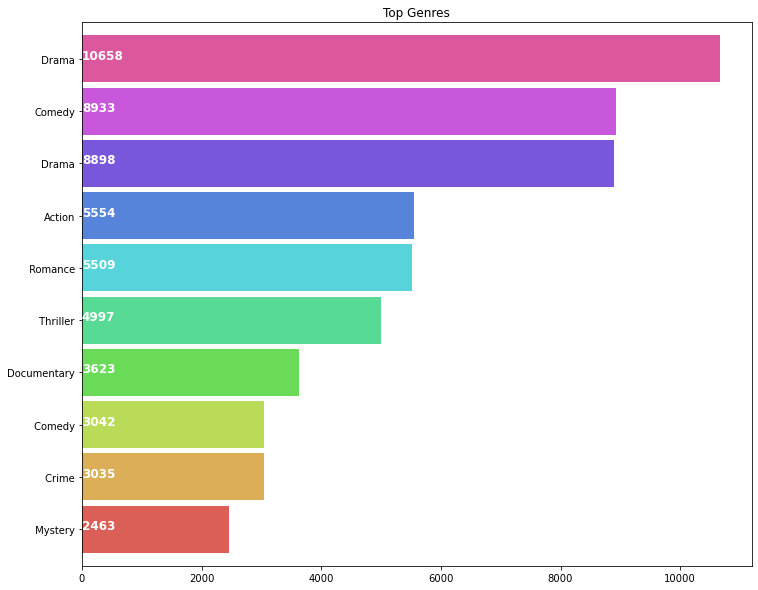

In [7]:
#Let’s plot the genres in terms of their occurrence to get an insight of movie genres in terms of popularity.

plt.subplots(figsize=(12,10))
list1 = []

for i in conteudo['Genre']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
    
plt.title('Top Genres')
plt.show()

In [8]:
#Now let's generate a list ‘genreList’ with all possible unique genres mentioned in the dataset.
genreList = []
for index, row in conteudo.iterrows():
    genres = row["Genre"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
            
genreList[:10] #now we have a list with unique genres

['Documentary',
 ' Short',
 'Short',
 ' News',
 ' Sport',
 ' Horror',
 ' Comedy',
 ' Action',
 ' Adventure',
 ' Drama']

## Trabalhando com Actors

In [9]:
conteudo['Actors'] = conteudo['Actors'].str.split(',')
print(conteudo['Actors'])

0                                               [Fred Ott]
1                                                    [N/A]
2        [Madeleine Koehler,  Marcel Koehler,  Mrs. Aug...
3                                                    [N/A]
4        [Jehanne d'Alcy,  Jules-Eugène Legris,  George...
                               ...                        
38007    [Isabella Ragonese,  Alessio Boni,  Thomas Tra...
38008                                                [N/A]
38009     [Amol Parashar,  Smiriti Kalra,  Gulshan Grover]
38010    [Pijakkana Wongsarattanasin,  Tanapol Jarujitt...
38011    [Brigitte Nielsen,  Talia Shire,  Sylvester St...
Name: Actors, Length: 38012, dtype: object


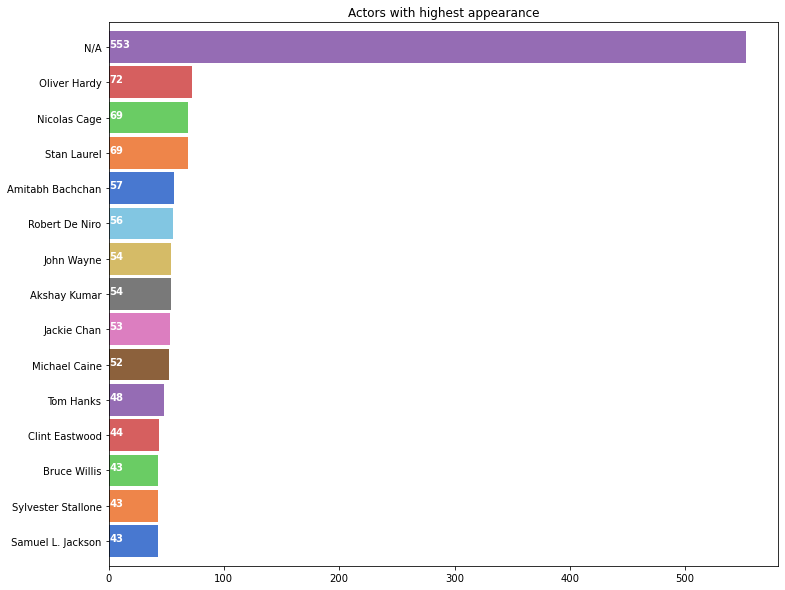

In [10]:
#Let’s plot a graph of Actors with Highest Appearances
plt.subplots(figsize=(12,10))
list1=[]

for i in conteudo['Actors']:
    list1.extend(i)
    
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))

for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
    
plt.title('Actors with highest appearance')
plt.show()

When I initially created the list of all the cast, it had around 50k unique values, as many movies have entries for about 15–20 actors. But do we need all of them? The answer is No. We just need the actors who have the highest contribution to the movie. For eg: The Dark Knight franchise has many actors involved in the movie. But we will select only the main actors like Christian Bale, Micheal Caine, Heath Ledger. I have selected the main 4 actors from each movie.
One question that may arise in your mind is that how do you determine the importance of the actor in the movie. Luckily, the sequence of the actors in the JSON format is according to the actor’s contribution to the movie.
Let’s see how we do that and create a column ‘cast_bin’


In [11]:
for index, row in conteudo.iterrows():
    list2 = []
    list2 = row['Actors'][:4] #seleciona os 4 mains actors
    row['Actors_4'] = list2
    
#conteudo['Actors'] = conteudo['Actors'].str.strip('[]').str.replace(' ','').str.replace("'",'')
#conteudo['Actors'] = conteudo['Actors'].str.split(',')
conteudo.head(5)

,ItemId,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Season,Episode,seriesID
0,c9f0f895fb,Edison Kinetoscopic Record of a Sneeze,1894,N/A,09 Jan 1894,1 min,"[Documentary, Short]",William K.L. Dickson,N/A,[Fred Ott],...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
1,d3d9446802,Leaving the Factory,1895,Not Rated,22 Mar 1895,1 min,"[Documentary, Short]",Louis Lumière,N/A,[N/A],...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
2,c20ad4d76f,The Arrival of a Train,1896,Not Rated,25 Jan 1896,1 min,"[Documentary, Short]","Auguste Lumière, Louis Lumière",N/A,"[Madeleine Koehler, Marcel Koehler, Mrs. Aug...",...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
3,8e296a067a,The Oxford and Cambridge University Boat Race,1895,N/A,N/A,N/A,"[Short, News, Sport]",Birt Acres,N/A,[N/A],...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN
4,54229abfcf,The House of the Devil,1896,Not Rated,24 Dec 1896,3 min,"[Short, Horror]",Georges Méliès,Georges Méliès,"[Jehanne d'Alcy, Jules-Eugène Legris, George...",...,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN


## Trabalhando com Diretors

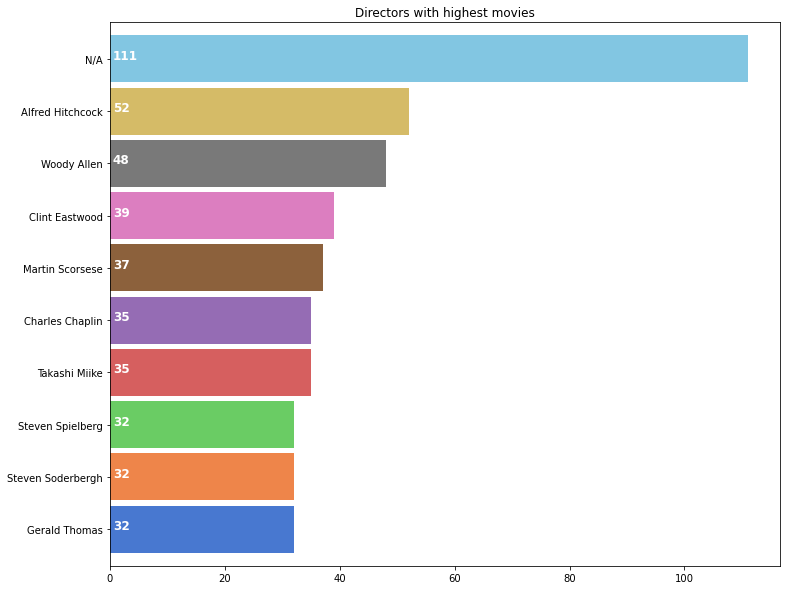

In [12]:
#Let’s plot Directors with maximum movies
def xstr(s):
    if s is None:
        return ''
    return str(s)

conteudo['Director'] = conteudo['Director'].apply(xstr)
plt.subplots(figsize=(12,10))

ax = conteudo[conteudo['Director']!=''].Director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))

for i, v in enumerate(conteudo[conteudo['Director']!=''].Director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
    
plt.title('Directors with highest movies')
plt.show()

## Trabalhando com Keywords - vou usar Plot
The keywords or tags contain a lot of information about the movie, and it is a key feature in finding similar movies. For eg: Movies like “Avengers” and “Ant-man” may have common keywords like superheroes or Marvel.
For analyzing keywords, we will try something different and plot a word cloud to get a better intuition:

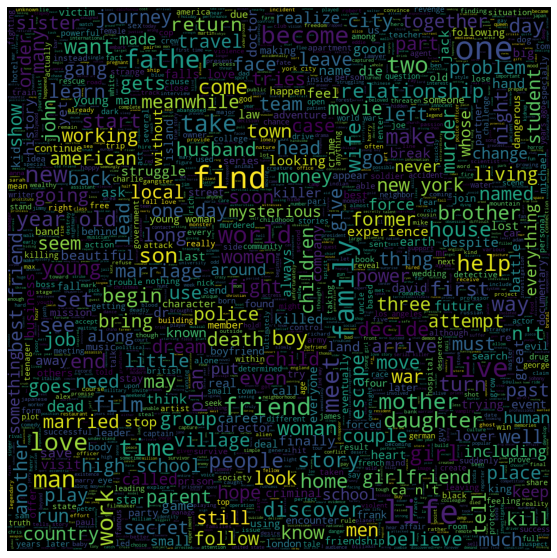

In [13]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=conteudo['Plot'].dropna().apply(nltk.word_tokenize)

word=[]
for i in words:
    word.extend(i)
    
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)

wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [14]:
print(conteudo['Plot'])

0        A man (Edison's assistant) takes a pinch of sn...
1        A man opens the big gates to the Lumière facto...
2        A group of people are standing in a straight l...
3        Although the content of this film is primitive...
4        A bat flies into an ancient castle and transfo...
                               ...                        
38007    A determined prosecutor becomes consumed with ...
38008    This documentary traces the rise and crash of ...
38009    The government announces demonetization. The s...
38010    A love triangle story of a young woman named "...
38011                                                  N/A
Name: Plot, Length: 38012, dtype: object


In [108]:
conteudo['keywords'] = conteudo['Plot'].str.split(' ')

In [121]:
words_list = []
for index, row in conteudo.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)
            
conteudo['words_bin'] = conteudo['keywords'].apply(lambda x: binary(x))
#conteudo = conteudo[(conteudo['vote_average']!=0)] #removing the movies with 0 score and without drector names 
conteudo = conteudo[conteudo['Director']!='']

## Voltando ao TF IDF

In [38]:
conteudoCompleto = pd.read_csv("binarios.csv")

/Users/clarissescofield/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
features = ['Genre', 'Title', 'Actors', 'Director']


In [79]:
conteudo['Director'].isnull().values.any()

False

In [80]:
#combine string
def combine_features(row):
    row['Genre_str'] = ' '.join([str(elem) for elem in row['Genre']])
    row['Actors_str'] = ' '.join([str(elem) for elem in row['Actors']])

    return row['Genre_str'] +' '+row['Title']+' '+row['Director']+' '+ row['Actors_str']

In [81]:
#preprocess
for feature in features:
    conteudo[feature] = conteudo[feature].fillna('')

In [82]:
conteudo['combined_features'] = conteudo.apply(combine_features, axis = 1)

In [83]:
print(conteudo.loc[0, 'combined_features'])

Documentary  Short Edison Kinetoscopic Record of a Sneeze William K.L. Dickson Fred Ott


### Função inicia

In [84]:
#funcao drop
def drop(ratings, idx, coluna, arvores):
        valores = ratings.iloc[:, idx]
        ratings[coluna] = valores

        valores, counts = np.unique(valores, return_counts=True)
        drop_values = [v for k, v in enumerate(valores) if counts[k] <= arvores]
        ratings = ratings.drop(ratings[ratings[coluna].isin(drop_values)].index)

        valores = [v for v in valores if v not in drop_values] 
        return ratings.drop(coluna, axis=1),   {v: k  for k, v in enumerate( sorted(valores) ) }

In [86]:
vocab_df = {}
k = 0 
cont = {}
itens = {}

treino, usuarios = drop(treino, 0, 'users',20) 

for index, linha in conteudo.iterrows():
    item = linha["ItemId"]
    itens[item] = k
    k = k + 1

    atributos  = linha[conteudo.columns.difference(['ItemId'])]

    #dicionario de atributos
    cont[item] = []
    cont[item].append(atributos)

    if 'combined_features' not in atributos: 
        descricao = ['n/a']
    else:
        descricao = [atributos['combined_features'].lower()]
        
    cont[item].append(descricao)
    
    #contagem de repeticao de termos
    for term in descricao:
        if term not in vocab_df:
            vocab_df[term] = 1
        else:
            vocab_df[term] += 1

print(vocab_df)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Função calcular tf

In [ ]:
TEXT = 1
chaves_idx = {v:k for k,v in enumerate(vocab_df)}

TF_IDF = []
for k, item in enumerate(itens.keys()):
            
    vetor = np.zeros(len(vocab_df)) 
    for term in cont[item][TEXT]:
                
        tf  = cont[item][TEXT].count(term)
        idf = np.log( len(cont)/ vocab_df[term]) 

        vetor[chaves_idx[term]] = tf * idf

    TF_IDF = np.append(TF_IDF, vetor)

    TF_IDF = np.asarray(TF_IDF)

print(TF_IDF)

### Função matriz de utilidade

In [72]:
#valores = treino.iloc[:, 0]
#valores, counts = np.unique(valores, return_counts=True)
#usuarios = { v: k  for k, v in enumerate( sorted(valores) ) }
#print(usuarios)

{'0004d0b59e': 0, '00053f5e11': 1, '00056c20eb': 2, '0006246bee': 3, '0006aabe0b': 4, '0006dd05ea': 5, '0007789b11': 6, '000871c1fc': 7, '000a91f3e3': 8, '000e82a96e': 9, '00106ac918': 10, '00126b47d5': 11, '0012a83c1e': 12, '0012e5ac66': 13, '00185f4533': 14, '001bf9e120': 15, '001c10d28e': 16, '001c728a30': 17, '001d343922': 18, '001d47bd41': 19, '001e1afaa2': 20, '001f35b87b': 21, '001fca6b30': 22, '0021a9a08c': 23, '0023a1e344': 24, '0023daa5a4': 25, '0025ad7a49': 26, '0025ed4265': 27, '0027593710': 28, '0028a24e18': 29, '0029840be1': 30, '002adf8f5f': 31, '002c3a40ac': 32, '002f8568c2': 33, '002f948c7a': 34, '002fdf1e30': 35, '0033ac3034': 36, '0036878972': 37, '0038c2d256': 38, '003a8eb481': 39, '003ae4e8b9': 40, '003af5a042': 41, '003bed21fd': 42, '003d859bbd': 43, '003da94355': 44, '003dc1fa10': 45, '003dd617c1': 46, '003f23cd58': 47, '003fd16c0d': 48, '003fd8188c': 49, '00411460f7': 50, '0043182ba7': 51, '0043195c73': 52, '0044deeec4': 53, '00482b9bed': 54, '004881ebe3': 55, '

In [73]:
m, n = len(usuarios), len(itens)
matriz = np.full((m, n), np.nan)

for index, linha in treino.iterrows():
    usuario_id = linha['UserId']
    item_id = linha['ItemId']
    matriz[usuarios.get(usuario_id), itens.get(item_id)] = linha['Rating']

print(matriz)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


### Funcao de construir vetor de usuarios

In [74]:
vetor_usuarios = []

for k, usuario in enumerate(usuarios):
            
    indices = np.nonzero( ~np.isnan(matriz[usuarios[usuario]]) )[0]
            
    user_vector = np.asarray([matriz[usuarios[usuario], idx] * TF_IDF[idx] for idx in indices]) 
    user_vector = (1/len(indices)) * user_vector.sum(axis=0)
            
    vetor_usuarios.append(user_vector)
    
print(vetor_usuarios)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Várias médias e valores

In [75]:
media_usuarios = np.nanmean(matriz, axis=1)
max_usuario  = np.nanmax(matriz, axis=1)
min_usuario  = np.nanmin(matriz, axis=1)
range_usuario = [min_usuario - media_usuarios, max_usuario - min_usuario]

media_item  = np.nanmean(matriz, axis=0)
std_item   = np.nanstd(matriz, axis=0)
soma_item = np.sum(np.isnan(matriz), axis=0)

media_global = np.nanmean(matriz)

/Users/clarissescofield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


### Função de similaridade

In [76]:
def similaridade(TF_IDF, user, item, vetor_usuarios, range_usuario, media_usuarios):
    vetor_usuario = vetor_usuarios[user]
    vetor_item = TF_IDF[item]

    sim = np.dot(vetor_usuario, vetor_item)/ ( np.linalg.norm(vetor_usuario)*np.linalg.norm(vetor_item) )

    # umin + (umax-umin)*sim
    delta = range_usuario[0][user] + (range_usuario[1][user]-range_usuario[0][user])*sim 
    
    return min(10, max(media_usuarios[user] + delta,0))

### Predição 

In [77]:
items_rated = np.unique([ui for ui in treino['ItemId']]) 
items_rated = {v: k  for k, v in enumerate(sorted(items_rated))} 
predicoes = []
tipo = []

for i in range(len(teste)):
    usuario = teste.iloc[i]['UserId']
    item = teste.iloc[i]['ItemId']
    usuario = usuarios.get(usuario)  
    item_rated = items_rated.get(item) 
    item = itens.get(item)

    if usuario is None and item_rated is None :
        tipo.append('cold')
        pred = media_global

    elif usuario is None:
        tipo.append('cold')
        pred = media_item[item] - 10 * (std_item[item]/soma_item[item])

    else:
        tipo.append('sim')
        pred = similaridade(TF_IDF, usuario, item, vetor_usuarios, range_usuario, media_usuarios)

    predicoes.append(media_global if np.isnan(pred) else pred)

teste['Rating'] = predicoes
teste = teste.groupby('UserId', as_index=False).apply(lambda x: x.sort_values('Rating', ascending=False))
teste = teste.drop('Rating', axis=1)

teste.to_csv('testeCombined.csv', sep=',', index=False)

/Users/clarissescofield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
